<a href="https://colab.research.google.com/github/IshaanKulkarni/makemore/blob/master/makemore_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn.functional as f
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()
words=open('names.txt','r').read().splitlines()
words[:5]

Saving names.txt to names.txt


['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(f'stoi={stoi}')
print(f'itos={itos}')

stoi={'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
itos={1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [35]:
# building the dataset to work with out neural network
block_size=3 #Number of characters inputted to predict the next character
def build_dataset(words):
  X,Y =[],[]
  for w in words:
    # print(w)
    context=[0]*block_size
    for ch in w+'.':
      ix=stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '------>', itos[ix]) Only un comment if working wiht less than 10 words
      context=context[1:]+[ix] #crop and append. kind of like a rolling window

  X=torch.tensor(X)
  Y=torch.tensor(Y)
  print(X.shape,Y.shape)
  return X,Y

import random
random.seed(18)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))
Xtr,Ytr=build_dataset(words[:n1])
Xvl,Yvl=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])



torch.Size([182320, 3]) torch.Size([182320])
torch.Size([22953, 3]) torch.Size([22953])
torch.Size([22873, 3]) torch.Size([22873])


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
C=torch.randn((27,2))

In [8]:
emb=C[X]
emb.shape

torch.Size([228146, 3, 2])

In [9]:
W1=torch.randn((6,100)) #Since each letter gives a 2 dimentional embedding and we are considering 3 letters, total input to the nn would be 6 values. Also, we randomly decide to use 100 neurons.
b1=torch.randn(100) #Biases for the 100 neurons

# We basically want to do emb@W1 +b1. But that is not possible. Because, the dimentions of the matrices do nnot match. We will conc. each row of emb to get a 32*6 matrix.
# Many ways to do it. But, the fastest one is view.


In [10]:
k=torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1)

In [11]:
print(k)

tensor([[-0.3455,  0.0943, -0.3455,  0.0943, -0.3455,  0.0943],
        [-0.3455,  0.0943, -0.3455,  0.0943, -2.9630,  0.1667],
        [-0.3455,  0.0943, -2.9630,  0.1667, -1.0442, -1.0108],
        ...,
        [ 0.0094, -1.3495,  0.0094, -1.3495,  0.1513, -0.2446],
        [ 0.0094, -1.3495,  0.1513, -0.2446,  0.0094, -1.3495],
        [ 0.1513, -0.2446,  0.0094, -1.3495, -0.4285,  2.0931]])


In [13]:
# fastest method
# Due to the way tensors are stored in the computer memory.
emb.view(-1,6)

tensor([[-0.3455,  0.0943, -0.3455,  0.0943, -0.3455,  0.0943],
        [-0.3455,  0.0943, -0.3455,  0.0943, -2.9630,  0.1667],
        [-0.3455,  0.0943, -2.9630,  0.1667, -1.0442, -1.0108],
        ...,
        [ 0.0094, -1.3495,  0.0094, -1.3495,  0.1513, -0.2446],
        [ 0.0094, -1.3495,  0.1513, -0.2446,  0.0094, -1.3495],
        [ 0.1513, -0.2446,  0.0094, -1.3495, -0.4285,  2.0931]])

In [14]:
h=torch.tanh(emb.view(emb.shape[0],6)@W1+b1)
h.shape

torch.Size([228146, 100])

In [15]:
h

tensor([[ 0.6446, -0.6479,  0.9952,  ...,  0.6510, -0.7697, -0.6619],
        [ 0.9845,  0.9709,  0.9999,  ...,  0.8550, -0.9383,  0.9901],
        [ 0.9936, -0.9998,  1.0000,  ...,  0.9980,  0.4723, -0.9944],
        ...,
        [-0.4296, -0.9879,  0.9970,  ...,  0.9990, -0.3820, -0.1109],
        [ 0.6368, -0.9538,  0.8010,  ...,  0.9979, -0.5155, -0.4887],
        [-0.7345,  0.2726,  1.0000,  ...,  0.9705, -0.6749,  0.1741]])

In [16]:
W2=torch.randn(100,27)
b2=torch.randn(27)

In [17]:
logits=h@W2+b2

In [18]:
logits.shape

torch.Size([228146, 27])

In [19]:
counts=logits.exp()

In [20]:
prob=counts/counts.sum(1,keepdims=True)

In [22]:
loss=-prob[torch.arange(228146),Y].log().mean()
loss

tensor(17.0064)

In [23]:
# The last 3 steps can be easily calculated using f.cross_entropy() which is an activation function we use for classification.
# Efficient because we do not create extra tensors. Also, backward pass is easier.
f.cross_entropy(logits,Y)

tensor(17.0064)

In [100]:
#  So, we put everything together:
C=torch.randn(27,2) # This is our intital embedding layer
W1=torch.randn(6,100)
b1=torch.randn(100)
W2=torch.randn(100,27)
b2=torch.randn(27)
parameters=[C,W1,b1,W2,b2]


In [101]:
sum(p.nelement() for p in parameters) 

3481

In [102]:
for p in parameters:
  p.requires_grad=True

In [103]:
stepi=[]
lossi=[]

In [120]:
for i in range(10000):
  # forward pass
  ix=torch.randint(0,Xtr.shape[0],(32,))
  emb=C[Xtr[ix]]
  h=torch.tanh(emb.view(-1,6)@W1+b1) #32,100
  # print(h.shape)
  logits=h@W2+b2 #32,27
  loss=f.cross_entropy(logits,Ytr[ix])
  lossi.append(loss.log10().item())
  stepi.append(i)
  # backward pass
  for p in parameters:
    p.grad=None
  loss.backward()
  # update
  for p in parameters:
    p.data+=-0.1*p.grad

print('consolidated loss: ')
print(loss.item())
  

consolidated loss: 
3.0037379264831543


In [121]:
len(stepi)

22965

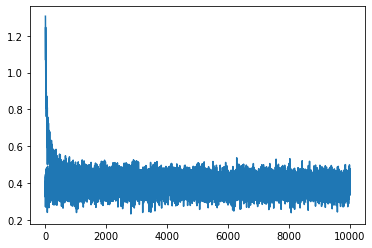

In [122]:
plt.plot(stepi,lossi)

In [123]:
emb=C[Xtr]
h=torch.tanh(emb.view(-1,6)@W1+b1)
logits=h@W2+b2
loss=f.cross_entropy(logits,Ytr)
loss

tensor(2.4512, grad_fn=<NllLossBackward0>)

In [124]:
emb=C[Xvl]
h=torch.tanh(emb.view(-1,6)@W1+b1)
logits=h@W2+b2
loss=f.cross_entropy(logits,Yvl)
loss

tensor(2.4484, grad_fn=<NllLossBackward0>)

In [125]:
emb=C[Xte]
h=torch.tanh(emb.view(-1,6)@W1+b1)
logits=h@W2+b2
loss=f.cross_entropy(logits,Yte)
loss

tensor(2.4591, grad_fn=<NllLossBackward0>)

In [126]:
for i in range(100):
  out=[]
  context=[0]*block_size
  while True:
    emb=C[torch.tensor(context)]
    h=torch.tanh(emb.view(-1,6)@W1+b1) #32,100
    # print(h.shape)
    logits=h@W2+b2 #32,27
    probs=f.softmax(logits,dim=1)
    # print(probs)
    ix=torch.multinomial(probs, num_samples=1).item()
    context=context[1:]+[ix]
    out.append(ix)
    if(ix==0):
      break

  print(''.join(itos[i] for i in out))

teno.
evedanne.
senn.
odiggeam.
ividmasavis.
akeph.
ori.
setttolomanoelt.
sim.
keen.
luxiuelyne.
esem.
wey.
mande.
kiccanidysnadynn.
welia.
veka.
puvitta.
emaamo.
bemt.
vent.
zemorth.
zen.
avird.
ryg.
elhiliegh.
kim.
nuskashanshella.
leccomeivlynomi.
gehse.
ashiclariy.
jalteggera.
desbb.
telarav.
sreskarloynax.
jecr.
anolle.
islavcidi.
bhiltetorrah.
nahdyann.
sh.
jelbene.
avnatyne.
arjian.
dun.
telah.
ave.
seria.
yyon.
esexthiem.
sva.
keyanne.
mamia.
yvijii.
dekian.
hera.
eldaztcttill.
gumnah.
mei.
bylen.
jakse.
roasax.
daf.
wakpanrist.
meila.
sexin.
seltanye.
vuy.
sela.
atmynm.
suy.
senin.
sresh.
ben.
cictebc.
enotliah.
vest.
tilaydahtyvilehgesene.
len.
bedmi.
eeh.
meek.
twariser.
pah.
juman.
eykiviam.
gulhan.
eydon.
dena.
masast.
ryn.
prie.
elelanary.
enm.
emic.
keroe.
lunca.
eva.
mastodannesta.
eum.
